# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

This section imports necessary libraries such as Pandas for data manipulation, NumPy for numerical operations, Matplotlib and Seaborn for visualization, warnings for filtering warnings, LabelEncoder for encoding categorical data, and train_test_split for splitting the data into training and testing sets.

## Reading the Dataset

In [2]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


The code reads a dataset from a CSV file named "Sleep_health_and_lifestyle_dataset.csv" using Pandas and displays the first few rows of the dataset.

### Dataset Information: 

In [3]:
#Dataset types and other informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB



This part displays information about the dataset, including the number of entries, columns, and data types of each column.


In [4]:
# Checking null Values
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

From the above returns the dataset has no null values

In [5]:
# Sum of each Target values
df['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

It calculates and displays the count of each unique value in the "Sleep Disorder" column, providing an overview of the distribution of sleep disorders.

In [7]:
#Split the Blood pressure value
df['Systolic_BP'] = df['Blood Pressure'].apply(lambda x : x.split('/')[0])
df['Diastolic_BP'] = df['Blood Pressure'].apply(lambda x : x.split('/')[1])

#convert the objects to numeric
df['Systolic_BP'] = pd.to_numeric(df['Systolic_BP'],errors='ignore')
df['Diastolic_BP'] = pd.to_numeric(df['Diastolic_BP'],errors='ignore')

The "Blood Pressure" column is split into "Systolic_BP" and "Diastolic_BP" columns by applying a lambda function to extract the values before and after the slash ("/").

The extracted systolic and diastolic values are converted to numeric values, and the comments explain that high blood pressure is defined based on certain thresholds.

High blood pressure is defined as having a **systolic blood pressure-[Systolic_BP]** (the top number) of 140 mmHg or higher and/or a **diastolic blood pressure-[Diastolic_BP]** (the bottom number) of 90 mmHg or higher

In [8]:
# Removing the unused column from the Dataset
df.drop(labels=['Blood Pressure','Person ID'],inplace=True,axis=1)

 The "Blood Pressure" and "Person ID" columns are removed from the dataset, as they are not needed for analysis.

In [9]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


## Data Analysis

<AxesSubplot: >

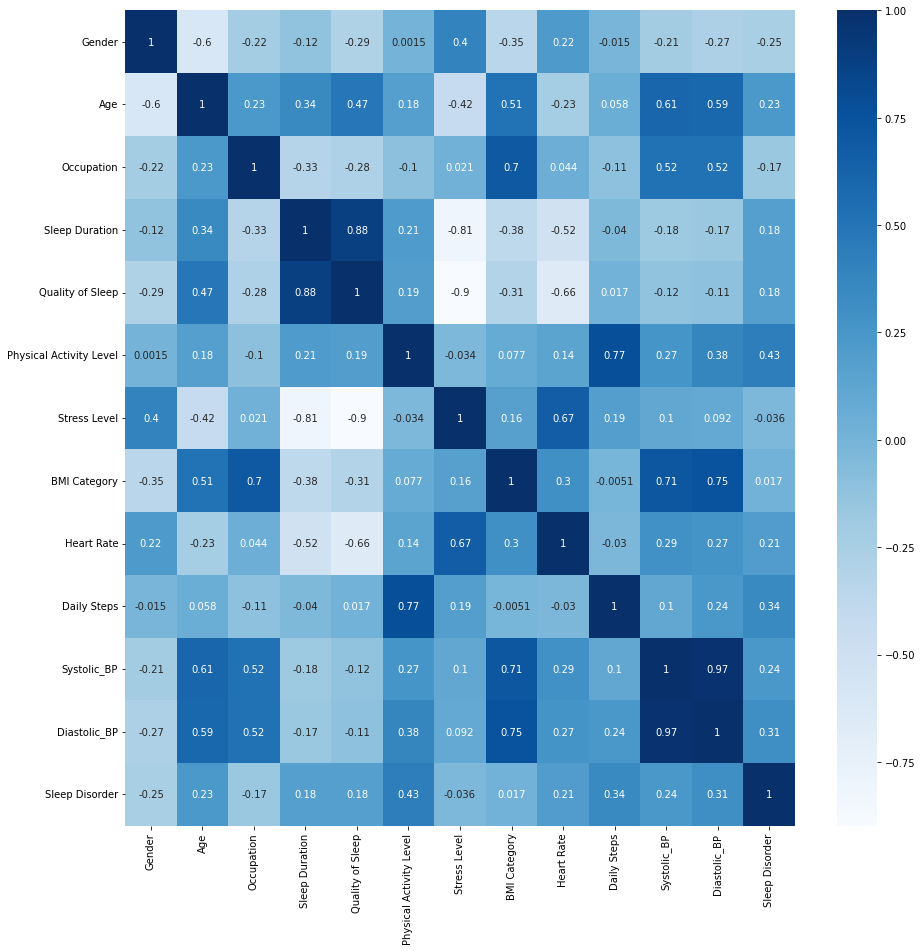

In [44]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

From the above figure the strees level column is highly correlated to Sleep Duration and Quality of Sleep column. So, removing the highly related column.

### Data Preprocessing

In [10]:
# Converting category column into numeric (using label encoding)
lb=LabelEncoder()
for col in df.select_dtypes(exclude='number').columns:
    df[col] = lb.fit_transform(df[col])

The categorical columns in the dataset are encoded using LabelEncoder, converting categorical values into numeric representations.

In [45]:
# Putting the target value in the last column
df=df.reindex(columns=['Gender', 'Age', 'Occupation', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Heart Rate', 'Daily Steps',
       'Systolic_BP', 'Diastolic_BP', 'Sleep Disorder'])

The columns are rearranged so that the "Sleep Disorder" column, which is the target variable, is placed at the end of the dataset and removed the higly correlated columns (Sleep Duration and Quality of Sleep column)

In [46]:
# Final Dataset
df.head()

,Gender,Age,Occupation,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic_BP,Diastolic_BP,Sleep Disorder
0,1,27,9,42,6,3,77,4200,126,83,1
1,1,28,1,60,8,0,75,10000,125,80,1
2,1,28,1,60,8,0,75,10000,125,80,1
3,1,28,6,30,8,2,85,3000,140,90,2
4,1,28,6,30,8,2,85,3000,140,90,2


In [47]:
x=df.iloc[:,:-1] # Independent Variable
y=df.iloc[:,-1:] # Dependent Variable - Target column

In [48]:
y.value_counts()

Sleep Disorder
1                 219
2                  78
0                  77
dtype: int64

From the above returns the target values are **not balance**

## Balance the target values using SMOTE

In [49]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=42)

x_sm,y_sm=smote.fit_resample(x,y)

The imbalanced target values are balanced using the Synthetic Minority Over-sampling Technique (SMOTE) from the imbalanced-learn library. It oversamples the minority classes to achieve a balanced distribution of target values.

In [50]:
y_sm.value_counts()

Sleep Disorder
0                 219
1                 219
2                 219
dtype: int64

From the ablove returns all the unique target values are balanced.

### Split the dataset (for training and testing)

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.3,random_state=42)

## Model Building

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,n_jobs=50,random_state=42)

A Random Forest Classifier model is created using the RandomForestClassifier class from scikit-learn. The `n_estimators` parameter specifies the number of decision trees in the forest, and `n_jobs` specifies the number of jobs to run in parallel for fitting.

In [53]:
model_rf = rf.fit(x_train,y_train)
y_pred = model_rf.predict(x_test)

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score

<AxesSubplot: >

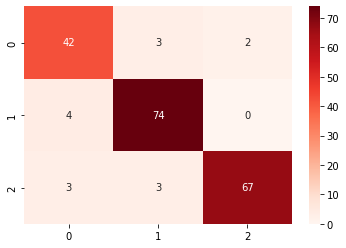

In [55]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Reds')

In [56]:
print('Accuracy Score : ',accuracy_score(y_test,y_pred))
print('Training Model Accuracy : ',model_rf.score(x_train,y_train))

Accuracy Score :  0.9242424242424242
Training Model Accuracy :  0.954248366013072


Confusion Matrix and Accuracy: The confusion matrix and accuracy score are computed using scikit-learn's `confusion_matrix` and `accuracy_score` functions. The confusion matrix is visualized using a heatmap from Seaborn.

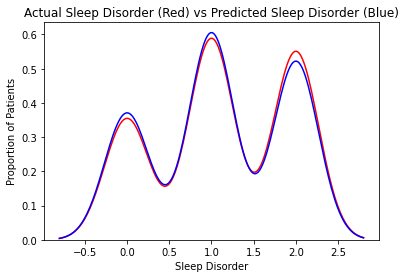

In [57]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values" , ax=ax)
plt.title('Actual Sleep Disorder (Red) vs Predicted Sleep Disorder (Blue)')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of Patients')
plt.show()

The visualization of the predicted values in blue and the actual values in red on the graph reveals that although the model's predictions tend to track the general curve of the actual values, there are noticeable discrepancies between the predicted and actual values. This indicates that the model's predictions are **almost accurate and may have some degree of error**. While the model captures certain patterns, it still struggles to precisely predict the actual values. As a result, there is room for improvement in enhancing the model's accuracy and reducing the disparities between the predicted and actual values.

### Decision tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [59]:
model_dt = dt.fit(x_train,y_train)
y_pred_dt = model_dt.predict(x_test)

<AxesSubplot: >

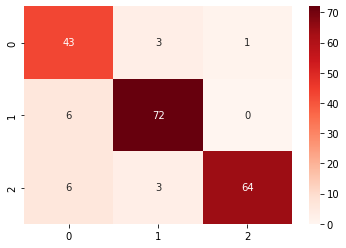

In [60]:
sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True,cmap='Reds')

In [61]:
print('Accuracy Score : ',accuracy_score(y_test,y_pred_dt))
print('Training Model Accuracy : ',model_rf.score(x_train,y_train))

Accuracy Score :  0.9040404040404041
Training Model Accuracy :  0.954248366013072


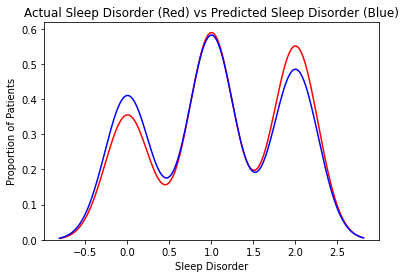

In [62]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_dt, hist=False, color="b", label="Predicted Values" , ax=ax)
plt.title('Actual Sleep Disorder (Red) vs Predicted Sleep Disorder (Blue)')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of Patients')
plt.show()

The visualization of the predicted values in blue and the actual values in red on the graph reveals that although the model's predictions tend to track the general curve of the actual values, there are noticeable discrepancies between the predicted and actual values. This indicates that the model's predictions are **not entirely accurate and may have some degree of error** . While the model captures certain patterns, it still struggles to precisely predict the actual values. As a result, there is room for improvement in enhancing the model's accuracy and reducing the disparities between the predicted and actual values.

# Conclusion

Two classification models, Random Forest Classifier and Decision Tree Classifier, were built and evaluated. Both models demonstrated good performance in predicting sleep disorders. The Random Forest Classifier outperformed the Decision Tree Classifier, achieving an accuracy of 92% on the test set. The results indicate that the Random Forest model is more robust and reliable for predicting sleep disorders in this dataset.